# Grupo 1

### Sebastián Velez Puerta

### Santiago Esteban Jurado Agudelo

# Librerías

In [1]:
# Start writing code h## IMPORTAMOS LA LIBRERIA PARA EL SISTEMA SLIT ###
!pip install lcapy
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipngere...

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached attrs-18.2.0-py2.py3-none-any.whl (34 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Not uninstalling attrs at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'attrs'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
twisted 22.8.0 requires attrs>=19.2.0, but you have attrs 18.2.0 which is incompatible.
service-identity 21.1.0 requires attrs>=19.1.0, but you have attrs 18.2.0 which is incompatible.
automat 20.2.0 requires attrs>=19.2.0, but you have attrs 18.2.0 which is incompatible.
You should consider upgrading via t

In [2]:
!pip uninstall sympy

Found existing installation: sympy 1.11.1
Not uninstalling sympy at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
Can't uninstall 'sympy'. No files were found to uninstall.


In [3]:
pip install sympy==1.10.1

  Using cached sympy-1.10.1-py3-none-any.whl (6.4 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
ERROR: Could not install packages due to an OSError: [Errno 30] Read-only file system: '/shared-libs/python3.9/py/bin/isympy'

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install lcapy==1.14

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ## LIBRERIA PARA HISTOGRAMA 
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
from lcapy import Circuit, j, omega, s
from numpy import logspace
import sympy as sym
from scipy.signal import lti 
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,optimizers,regularizers ## IMPORTAMOS LOS OPTIMIZADORES Y REGULARIZERS PARA EVITAR
## EL OVERFITTING.

2023-05-27 06:42:21.958954: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-27 06:42:22.103324: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-27 06:42:22.111118: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-27 06:42:22.111138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

### Generación de señales aleatorias

In [6]:
##FUNCIONES A UTILIZAR (TRANSFORMADA DE FOURIER)
#Función que Gráfica la transformada de Fourier y la función en el tiempo:
def fftp(t, signal,x,y=None):          #X es el intervalo simétrico en que quiero graficar el dominio de la frecuencia F.
  ft = fftshift(fft(signal))   #Saca la transformada de fourier centrada en cero(fft calcula la transformada de fourier como tal y el fftshift la centra). La fft es un algoritmo para calcular la transformada discreta de Fourier.
  w = fftshift(fftfreq(ft.shape[0],t[1]-t[0]))  #Se le saca el vector de frecuencias(Obviamente el vector de frecuencia debe tener el mismo tamaño del vector de tiempo y obviamente x(t) tiene el mismo tamaño que X(w))(ft.shape[0] es el tamaño del vector transformada de Fourier). También se utiliza el fftshift para lo mismo. El primer parámetro de fftfreq es el tamaño del vector de frecuencia y el segundo es el delta que hay entre cada w y por tanto entre cada t.
  mag = np.sqrt((ft.real**2)+(ft.imag**2))   #Magnitud del espectro
  phase = np.arctan(ft.imag/ft.real)         #Fase del espectro

  #Grafica de la señal en el tiempo:
  plt.figure(figsize=(14,12))   #Tamaño de la imagen de la gráfica
  plt.subplot(511) 
  plt.title('x(t)')
  plt.plot(t, signal)
  plt.grid()
  #Grafica de la parte imaginaría de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(512)  #Tengo 5 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Im{TF}')
  plt.plot(w, ft.imag)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la parte real de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(513)  #Tengo 4 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Re{TF}')
  plt.plot(w, ft.real)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la magnitud de la transformada de Fourier:
  plt.subplot(514)
  plt.plot(w,mag)
  plt.title('|FT|')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la fase -de la transformada de Fourier:
  plt.subplot(515)
  plt.plot(w,phase,'-',color='orange') #Grafica continua
  plt.stem(w,phase) #Grafica discreta
  plt.title('Phase')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  plt.xlabel('Frequency [Hz]')
  plt.show()


def Ploteo_tiempo_frecuencia2(tiempo,Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [KHz]')
    plt.ylabel('Amplitud')
    plt.show()

    return Ym


### Circuito

In [7]:
ctt=Circuit("""
Vi 1 0_1 step;down
C1 1 2; right, size=1.5
R1 2 0; down, size=1.5
C2 2 3; right
R3 2 3; right, offset=0.7
R2 3 0_3; down , v=(V_o)
W 0_1 0;right
W 0 0_3;right
"""
)
"""
Descripción arquitectura anterior:
- Vi va del nodo 1 al nodo 0_! y va hacia abajo.
- C1 va del nodo 1 al nodo 2 y va hacia la derecha.
- R1 va del nodo 2 al nodo 0 y va hacia abajo.
- C2 va del nodo 2 al nodo 3 hacia la derecha.
- R3 va del nodo 2 al nodo 3 hacia la derecha (En paralelo a C2 con una distancia de 0.9)
- R2 ba del nodo 3 al nodo 0_3 hacia abajo. 
- Se tira un cable del nodo 0_1 al nodo 1.
- Se tira un cable del nodo 0 al nodo 0_3.
 (size=1.5 es el calibre del cable).
"""

##ctt.draw()

'\nDescripción arquitectura anterior:\n- Vi va del nodo 1 al nodo 0_! y va hacia abajo.\n- C1 va del nodo 1 al nodo 2 y va hacia la derecha.\n- R1 va del nodo 2 al nodo 0 y va hacia abajo.\n- C2 va del nodo 2 al nodo 3 hacia la derecha.\n- R3 va del nodo 2 al nodo 3 hacia la derecha (En paralelo a C2 con una distancia de 0.9)\n- R2 ba del nodo 3 al nodo 0_3 hacia abajo. \n- Se tira un cable del nodo 0_1 al nodo 1.\n- Se tira un cable del nodo 0 al nodo 0_3.\n (size=1.5 es el calibre del cable).\n'

![Picture title](image-20221129-000435.png)

### Estimación de parametros

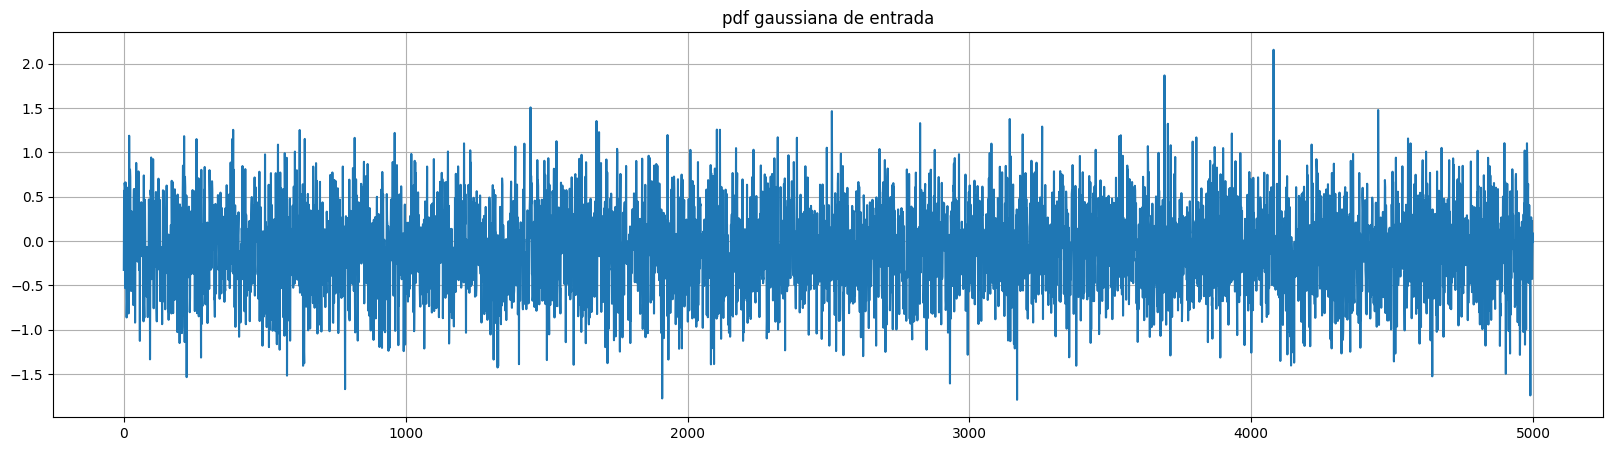

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generando la pdf gaussiana de entrada:
media = -0.1
sd = 0.5  # Reduciendo la desviación estándar para disminuir el ruido
size = 5000
pdf_gauss_input = np.random.normal(media, sd, size)
Autocorrelacion_Entrance = np.correlate(pdf_gauss_input, pdf_gauss_input, mode="same")
t1 = np.arange(0, size)

# Graficando la pdf gaussiana de entrada:
plt.figure(figsize=(20, 5))
plt.plot(t1, pdf_gauss_input)
plt.title("pdf gaussiana de entrada")
plt.grid()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 2000x500 with 0 Axes>

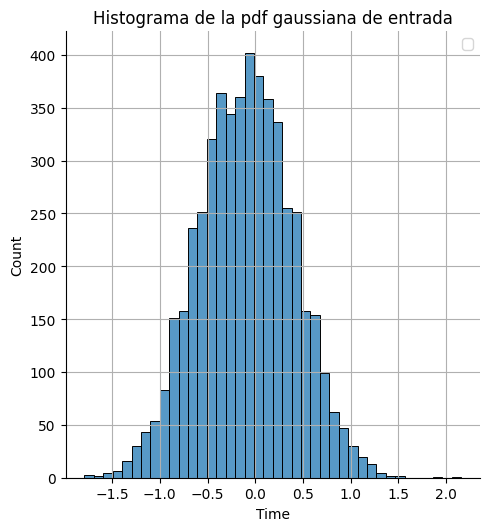

In [9]:
#Histograma de la pdg gaussiana de entrada:
plt.figure(figsize=(20,5))
sns.displot(pdf_gauss_input,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf gaussiana de entrada")
plt.xlabel("Time")
plt.grid()
plt.legend()

### Calculo funcion de transferencia

In [10]:
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN R2
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [11]:
#Dando valores al circuito:
C1=4.7e-4
C2=4.7e-4
R1=1500
R2=1000
R3=500
Coeficientes_num=[C1*C2*R1*R2*R3, C1*R1*R2, 0] #Coeficientes numerador
Coeficientes_dem=[C1*C2*R1*R2*R3, C1*R1*R2 + C1*R1*R3 + C2*R1*R3 + C2*R2*R3, R1 + R2 + R3] #Coeficientes denominador

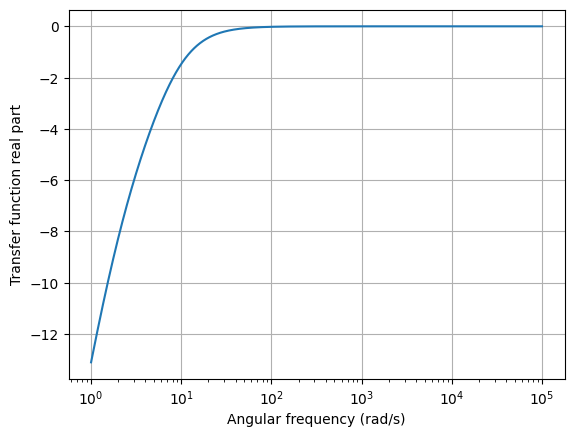

In [12]:
### LE ASIGNAMOS LOS VALORES A NUESTRA FUNCIÓN DE TRANSFERENCIA PARA VER EL COMPORTAMIENTO DEL CIRCUITO
### ASOCIADO A LOS PARAMETROS:
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2).subs("R3",R3)
W=logspace(0,5,2000) ## GENERAMOS VECTOR DE FRECUENCIAS EN ESCALA LOGARITMICA
X=H_valores(j*omega).dB.plot(W,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

In [13]:
import control
ct = control
sys = ct.tf(Coeficientes_num,Coeficientes_dem)
dt = 0.001  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

(array([0.02348416, 0.02364689, 0.02381074, 0.02397572, 0.02414184,
        0.02430911, 0.02447754, 0.02464713, 0.02481789, 0.02498983,
        0.02516296, 0.02533728, 0.02551281, 0.02568955, 0.02586751,
        0.0260467 , 0.02622712, 0.02640879, 0.02659172, 0.02677591,
        0.02696137, 0.02714811, 0.02733613, 0.02752546, 0.02771609,
        0.02790804, 0.02810131, 0.02829591, 0.02849186, 0.02868916,
        0.02888782, 0.02908785, 0.02928926, 0.02949205, 0.02969625,
        0.02990185, 0.03010887, 0.03031732, 0.0305272 , 0.03073853,
        0.03095132, 0.03116557, 0.0313813 , 0.03159851, 0.03181722,
        0.03203744, 0.03225917, 0.03248243, 0.03270723, 0.03293358,
        0.03316148, 0.03339095, 0.033622  , 0.03385464, 0.03408888,
        0.03432473, 0.03456221, 0.03480132, 0.03504207, 0.03528448,
        0.03552855, 0.0357743 , 0.03602174, 0.03627089, 0.03652174,
        0.03677432, 0.03702863, 0.03728469, 0.03754251, 0.03780209,
        0.03806347, 0.03832663, 0.0385916 , 0.03

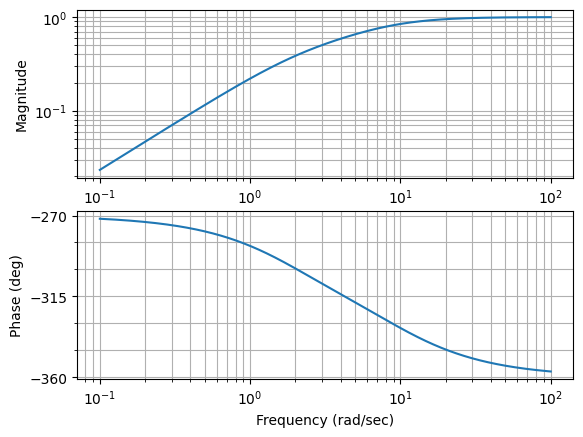

In [14]:
ct.bode(sys)

### Respuesta a impulso

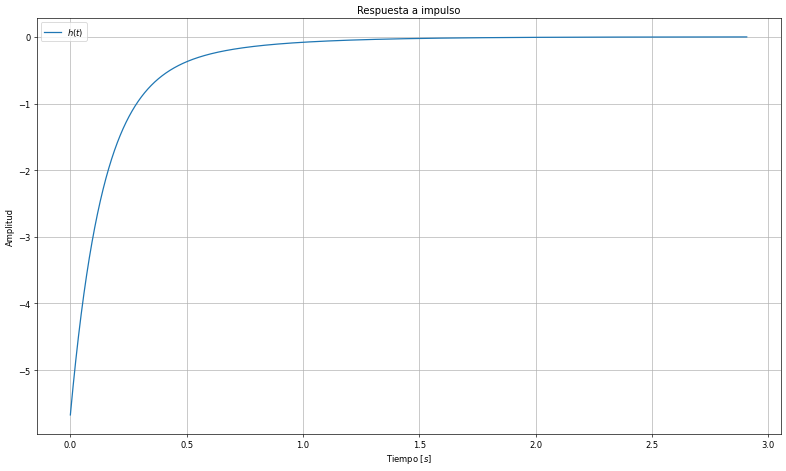

In [15]:
##OBSERVAMOS LA RESPUESTA AL IMPULSO:

t = np.linspace(0,4,4000)
lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI

t, h = lti_system.impulse(N=5000) # sistema LTI exitado con la función impulso

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

In [16]:
print('Impulse response median: ',h.mean())

Impulse response median:  -0.3443015274415157


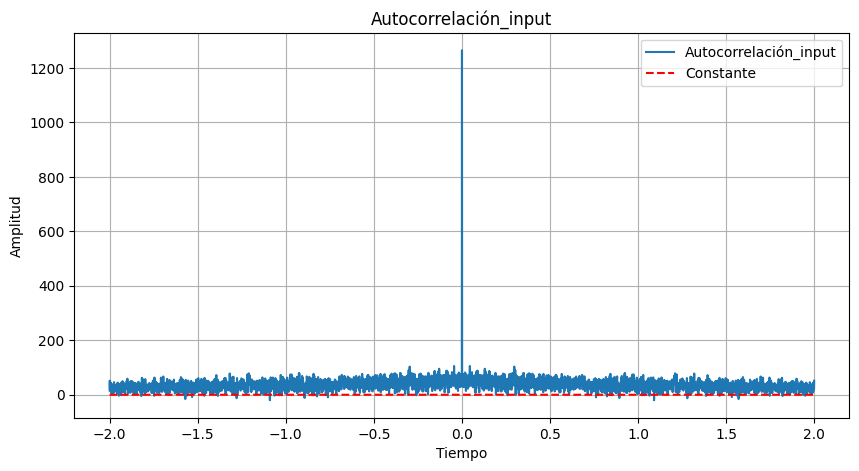

In [17]:
##ANALICEMOS LA ENTRADA, FUNCIÓN DE AUTOCORRELACIÓN Y DENSIDAD DE POTENCIA:

import numpy as np
import matplotlib.pyplot as plt

# Calcular la autocorrelación de la señal pdf_gauss_input
autocorrelacion_input = np.correlate(pdf_gauss_input, pdf_gauss_input, mode="same")

# Obtener la longitud de la autocorrelación y calcular el desplazamiento del eje de tiempo
n = len(autocorrelacion_input)
t_shifted = np.linspace(-2, 2, n)

# Crear una señal constante con valores horizontales de 0 a 2 basados en el eje de tiempo
signal = np.full_like(t_shifted, 0.5)

# Graficar la autocorrelación centrada en t=0 y la señal constante
plt.figure(figsize=(10, 5))
plt.title("Autocorrelación_input")
plt.plot(t_shifted, autocorrelacion_input, label="Autocorrelación_input")
plt.plot(t_shifted, signal, 'r--', label="Constante")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.grid()

plt.show()




/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


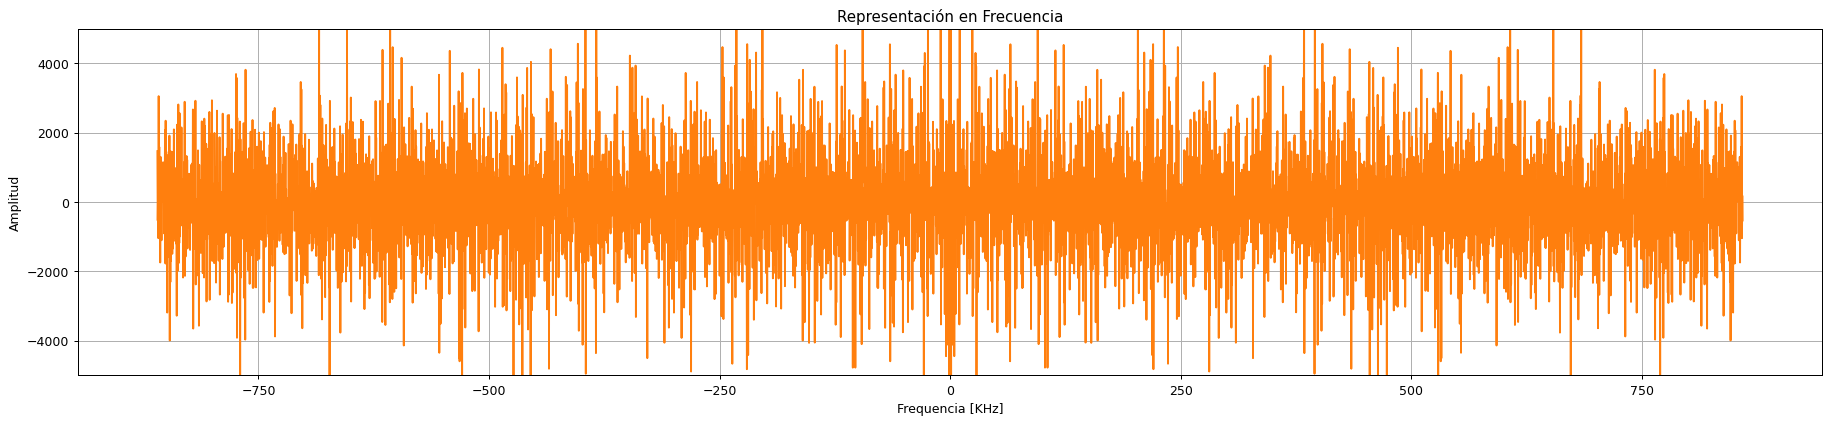

In [18]:
## GENEREMOS SU TRANSFORMADA PARA CONOCER LA DENSIDAD DE POTENCIA:
meanx = Ploteo_tiempo_frecuencia2(t1,autocorrelacion_input,xmax=None,ymax=5000)


### Estimacion parametros de salida

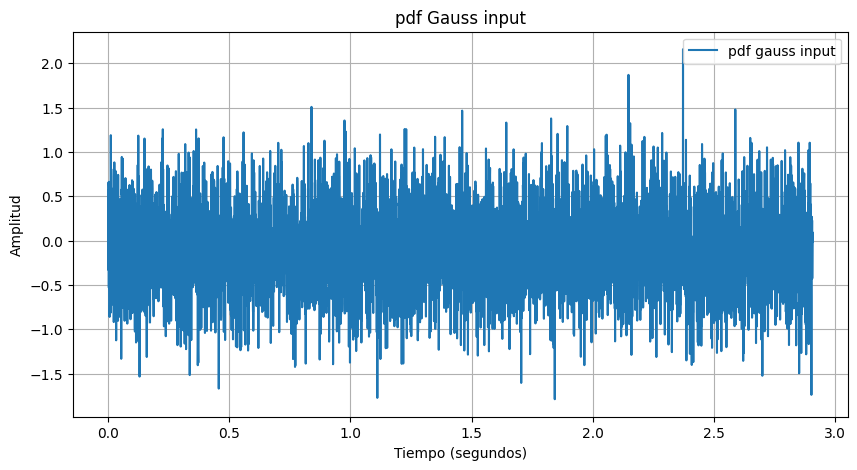

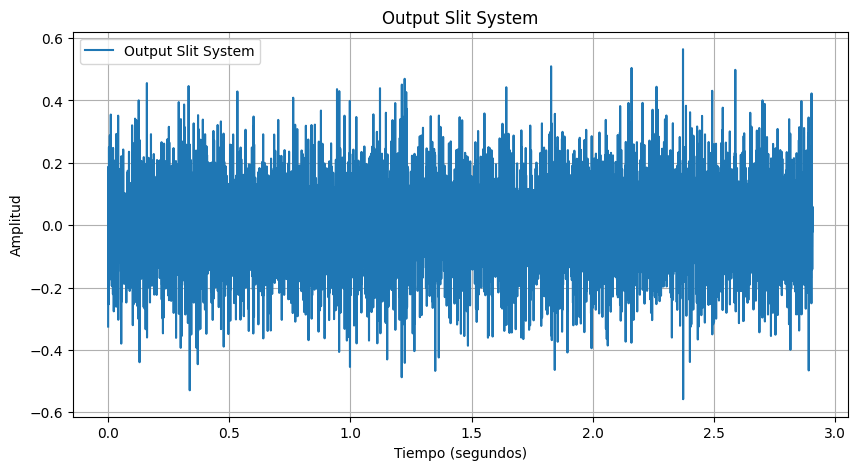

In [19]:
###INGRESANDO AL SISTEMA SLIT:
#pdf de salida:
_,output_pdf,_=lti_system.output(pdf_gauss_input, t1)
Autocorrelacion_Output=np.correlate(output_pdf,output_pdf,mode="same")
#pdf gaussiana Input
plt.figure(figsize=(10,5))
plt.title("pdf Gauss input")
plt.plot(t, pdf_gauss_input,label="pdf gauss input")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()
#pdf Output:
plt.figure(figsize=(10,5))
plt.title("Output Slit System")
plt.plot(t, output_pdf,label="Output Slit System")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x500 with 0 Axes>

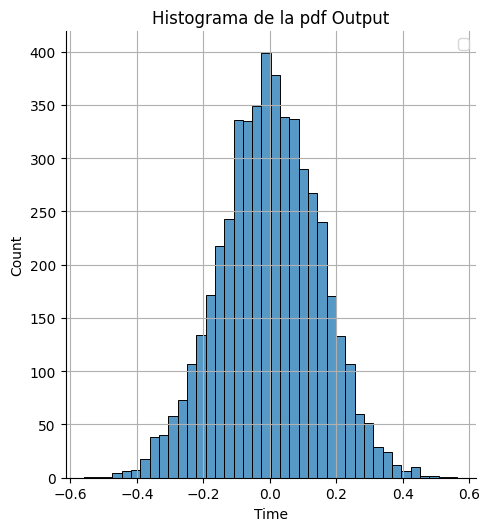

In [20]:
#Histograma de la pdf Output:
plt.figure(figsize=(10,5))
sns.displot(output_pdf,bins=40)
hist_kws={"edgecolor":"balck"}
plt.title("Histograma de la pdf Output")
plt.xlabel("Time")
plt.grid()
plt.legend()


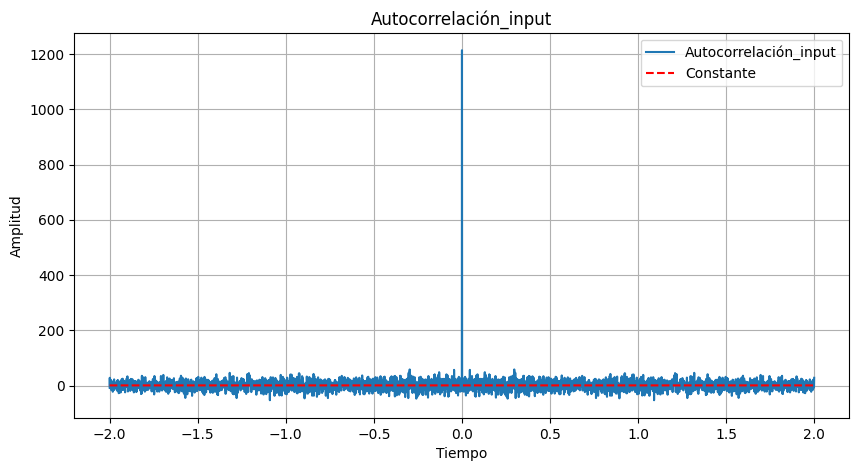

In [21]:
import numpy as np
import matplotlib.pyplot as plt

k,Output_Circuit,_=lti_system.output(pdf_gauss_input, t) ##SALIDA DEL CIRCUITO.
Autocorrelacion_Output=np.correlate(Output_Circuit,Output_Circuit,mode="same")

n = len(Autocorrelacion_Output)
t_shifted = np.linspace(-2, 2, n)

signal = np.full_like(t_shifted, 0.5)

plt.figure(figsize=(10, 5))
plt.title("Autocorrelación_input")
plt.plot(t_shifted, Autocorrelacion_Output, label="Autocorrelación_input")
plt.plot(t_shifted, signal, 'r--', label="Constante")
plt.legend()
plt.ylabel("Amplitud")
plt.xlabel("Tiempo")
plt.grid()

plt.show()


/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


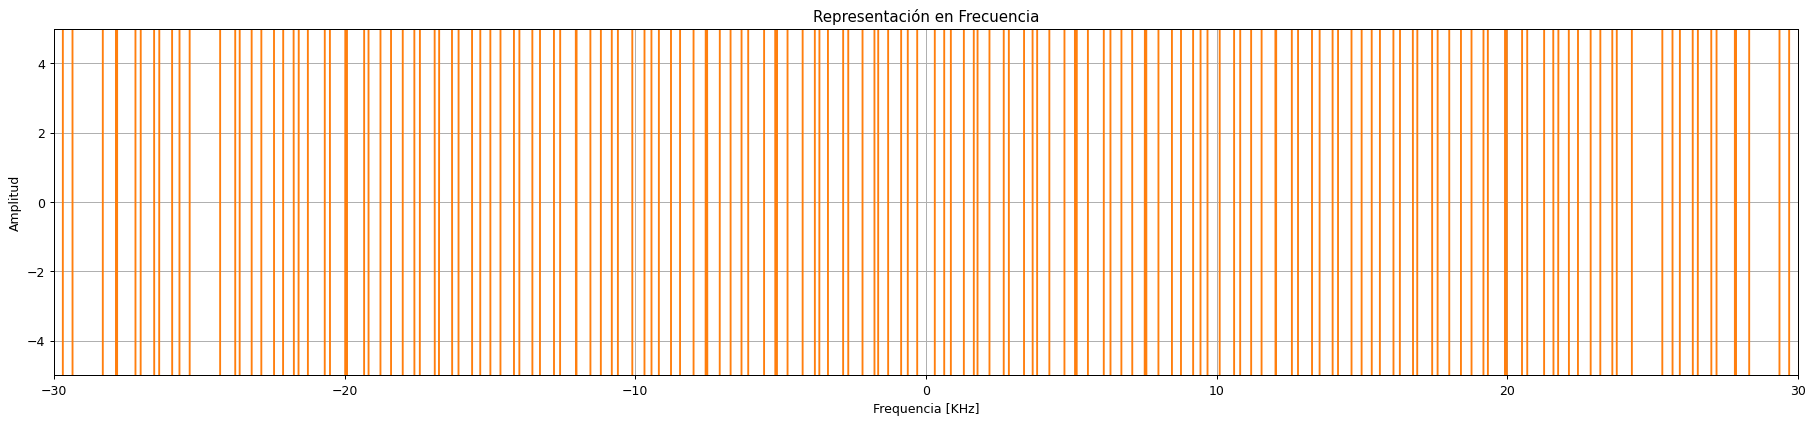

In [22]:
###SACANDO LA DENSIDAD ESPECTRAL DE POTENCIA A LA SALIDA TENDRIAMOS:
meany = Ploteo_tiempo_frecuencia2(t1,autocorrelacion_input,xmax=30,ymax=5)

In [23]:
import numpy as np
from scipy import signal

# Coeficientes de la función de transferencia
Coeficientes_num = [C1*C2*R1*R2*R3, C1*R1*R2]
Coeficientes_dem = [C1*C2*R1*R2*R3, C1*R1*R2 + C1*R1*R3 + C2*R1*R3 + C2*R2*R3, R1 + R2 + R3]

# Calcular respuesta en frecuencia
frequencies = np.logspace(0, 7, 2000)
sys = signal.TransferFunction(Coeficientes_num, Coeficientes_dem)
_, H = signal.freqresp(sys, frequencies)

# Frecuencia de corte
fc = 10  # Hz

# Calcular media y varianza teóricamente
omega_c = 2 * np.pi * fc
H_c = np.abs(H[np.argmin(np.abs(frequencies - fc))])
mean = 1 / omega_c
variance = (1 - H_c**2) / omega_c**2

print("Media teórica:", mean)
print("Varianza teórica:", variance)


Media teórica: 0.015915494309189534
Varianza teórica: 0.00025150610483453073


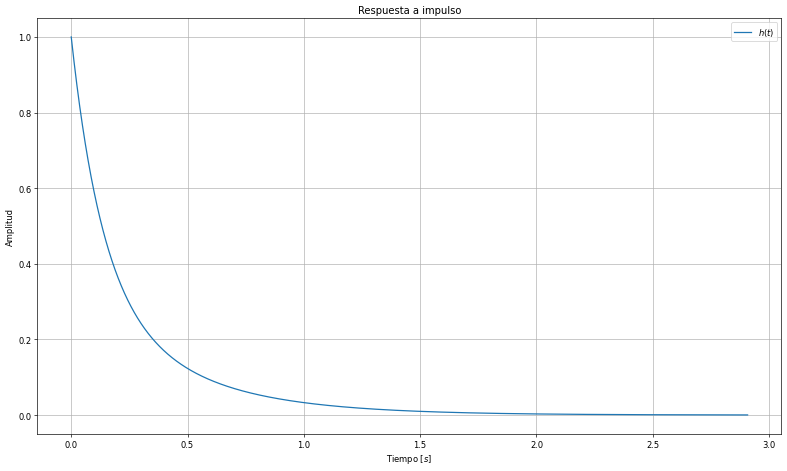

In [24]:
lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI
Nsample=4096 ## CANTIDAD DE MUESTRAS
t, h = lti_system.impulse(N=Nsample) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

### Calibracion base de tiempo

In [25]:
t = np.linspace(0,4,4096)
valor1 = np.cos(2 * np.pi * 1.5915494309 * t)  # Señal sinusoidal de 1 Hz
valor2 = np.cos(2 * np.pi * 15.9154943092 * t)  # Señal sinusoidal de 10 Hz
valor3 = np.cos(2 * np.pi * 159.1549430919 * t)  # Señal sinusoidal de 100 Hz

Text(0.5, 0, 'Time')

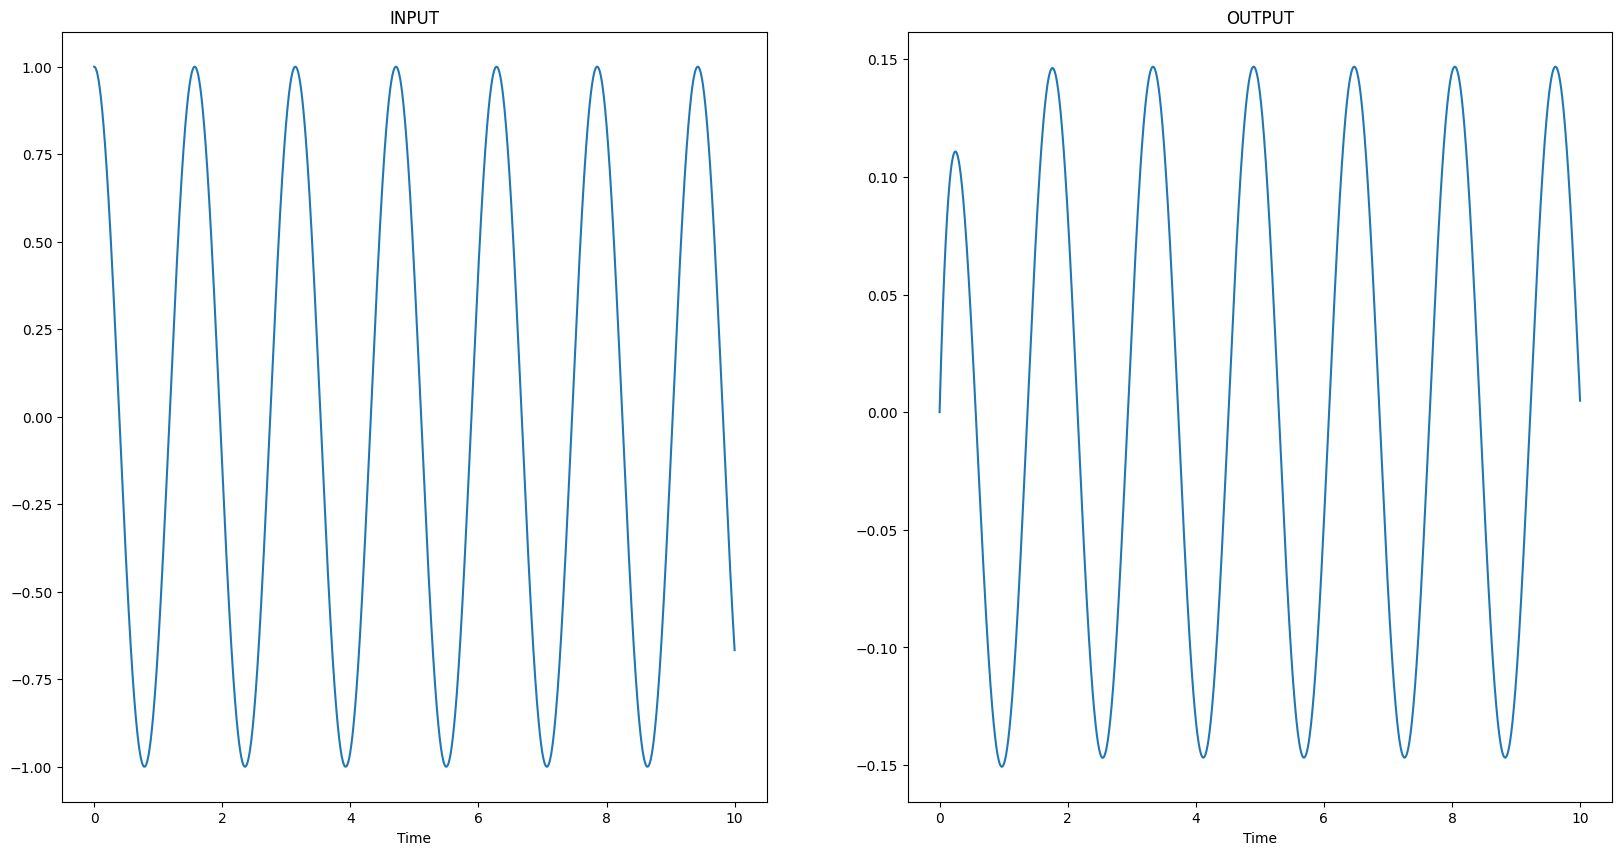

In [26]:
t1 = np.linspace(0,10,4096)

k1,Output_Circuit1,_ = lti_system.output(valor1,t1)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t1, valor1)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k1, Output_Circuit1)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

Text(0.5, 0, 'Time')

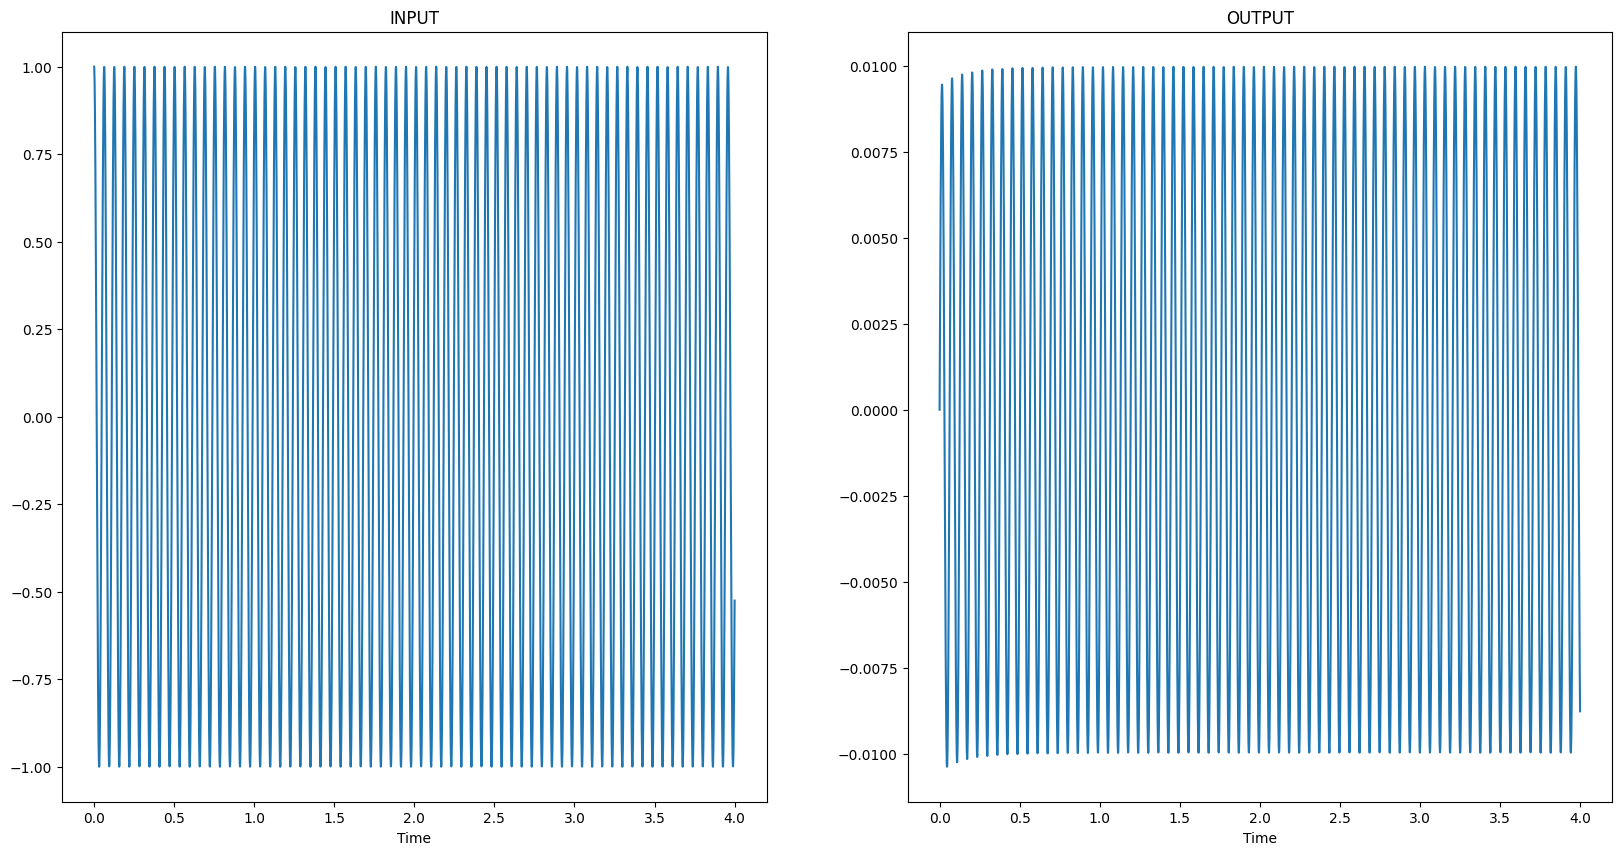

In [27]:
t2 = np.linspace(0,4,4096)

k2,Output_Circuit2,_ = lti_system.output(valor2,t2)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t2, valor2)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k2, Output_Circuit2)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

Text(0.5, 0, 'Time')

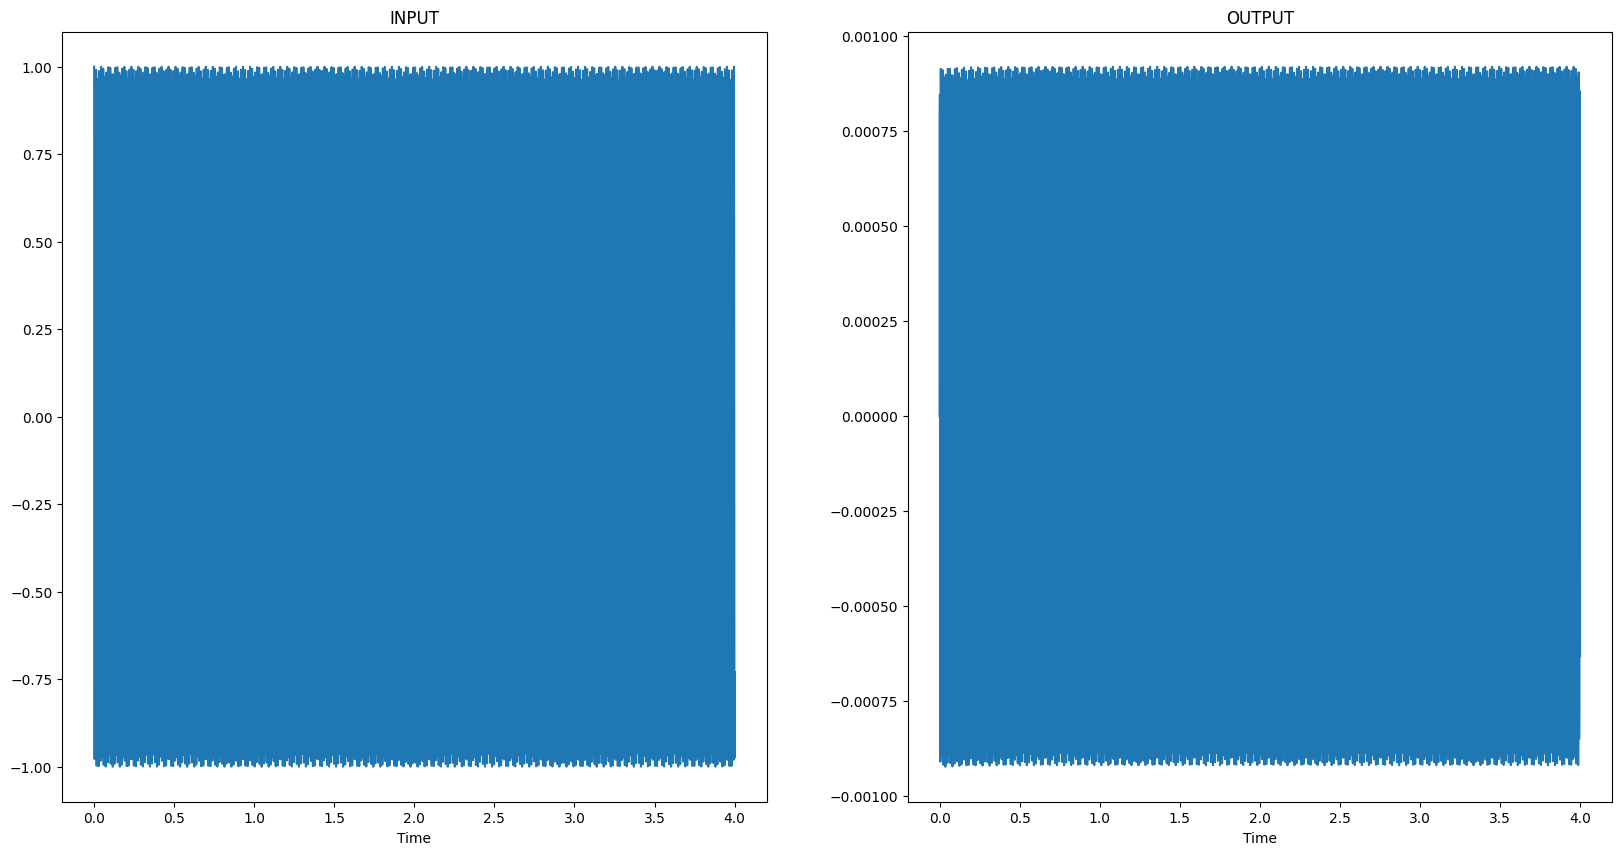

In [28]:
t3 = np.linspace(0,4,4096)

k3,Output_Circuit3,_ = lti_system.output(valor3,t3)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t3, valor3)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k3, Output_Circuit3)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

In [29]:
findmax10 = Output_Circuit1[1000:]
findmax100 = Output_Circuit2[1000:]
findmax1000 = Output_Circuit3[1000:]

print(findmax10.max())
print(findmax100.max())
print(findmax1000.max())

0.14683958128742886
0.009970005817955775
0.0009191719100825427


<function matplotlib.pyplot.show(close=None, block=None)>

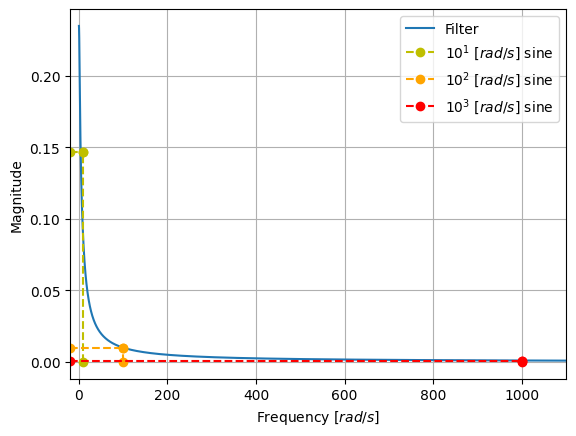

In [30]:
import numpy as np
W = np.logspace(-1, 4, 2000)
w, mag ,_ = lti_system.bode(w=W)

mag = ct.db2mag(mag)

plt.figure()
plt.grid(True)
plt.xlim((-20,1100))
plt.plot(w,mag, label="Filter")

plt.plot([10, 10], [0, findmax10.max()], 'o--', color='y',label="$10^1$ [$rad/s$] sine")
plt.plot([-20, 10], [findmax10.max(), findmax10.max()], 'o--', color='y')

plt.plot([100, 100], [0, findmax100.max()], 'o--', color='orange',label="$10^2$ [$rad/s$] sine")
plt.plot([-20, 100], [findmax100.max(), findmax100.max()], 'o--', color='orange')

plt.plot([1000, 1000], [0, findmax1000.max()], 'o--', color='r',label="$10^3$ [$rad/s$] sine")
plt.plot([-20, 1000], [findmax1000.max(), findmax1000.max()], 'o--', color='r')

plt.xlabel("Frequency [$rad/s$]")
plt.ylabel("Magnitude")
plt.legend()
plt.show

### Teorico media y desviacion estandar

$$y(t) = x(t)*h(t)$$
$$E[y(t)]=E[x(t)*h(t)]$$
$$E[y(t)]=E[x(t)]*E[h(t)] \rightarrow E[x(t)] = 0.1$$
$$E[y(t)]= 0.1*E[h(t)] \rightarrow E[h(t)] = \text{impulse response median}$$
$$E[y(t)]= 0.1*0.09207162267671537$$
$$E[y(t)]= 0.009207162267671537$$

### Coseno con ruido blanco gaussiano

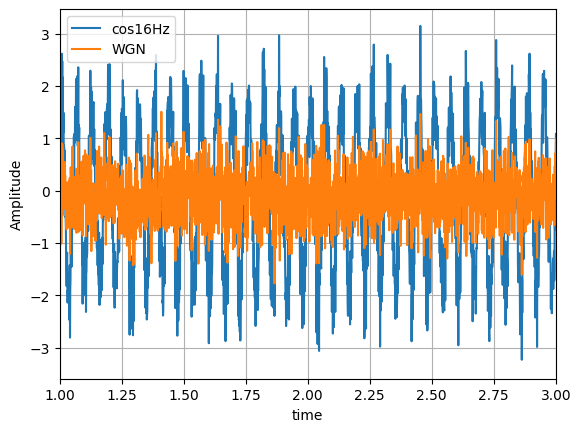

In [31]:
import numpy as np
import matplotlib.pyplot as plt

tsin = np.linspace(0, 4, 4096)

db = 5
gain = ct.db2mag(db)
cosine = gain * np.cos(2 * np.pi * 15.9154943092 * tsin)  # Señal sinusoidal de 16 Hz

# Ajustar el tamaño de pdf_gauss_input para que coincida con el tamaño de cosine
pdf_gauss_input = pdf_gauss_input[:len(tsin)]

new_signal = cosine + pdf_gauss_input

plt.figure()
plt.grid(True)
plt.plot(tsin, new_signal, label="cos16Hz")
plt.plot(t, pdf_gauss_input, label='WGN')
plt.xlim(1, 3)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [32]:
def autocross(x, y):
    c = np.correlate(x, y, "same")
    v = [c[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(c))]
    return v

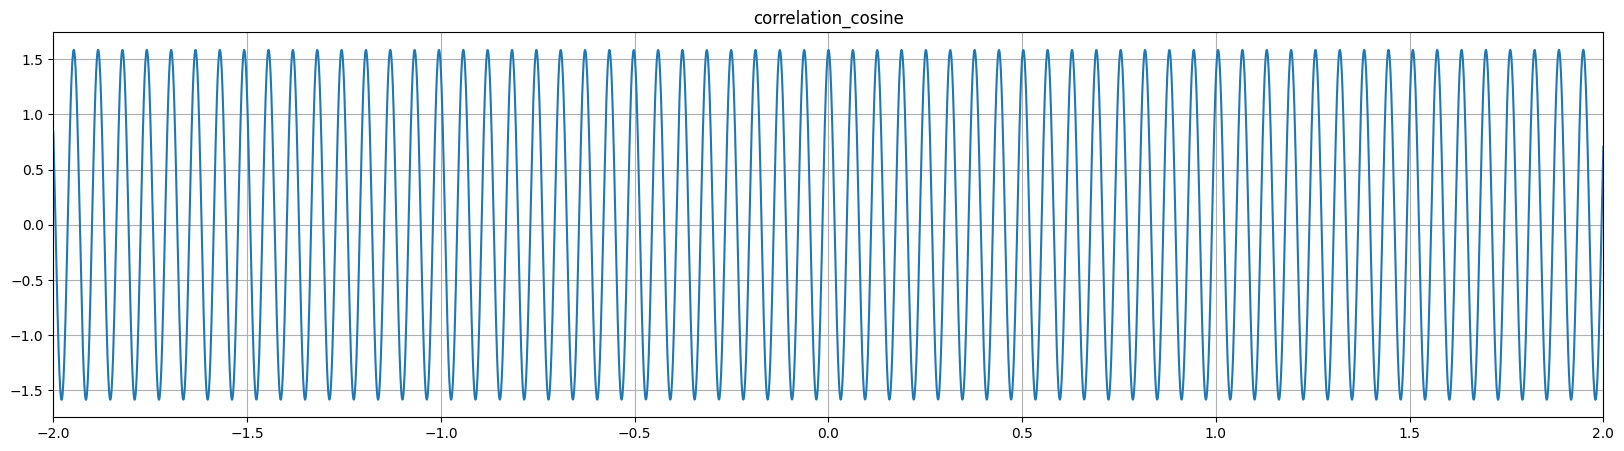

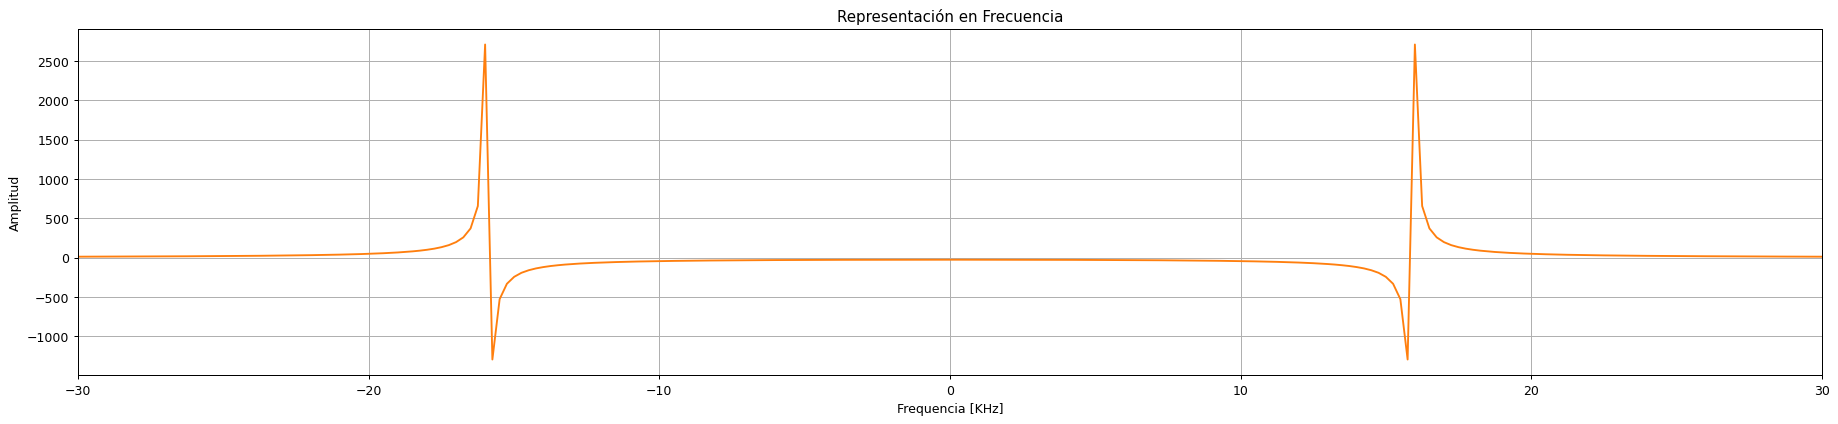

In [33]:
correlation_cosine = autocross(cosine,cosine)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_cosine)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation_cosine")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_cosine,xmax=30,ymax=None)

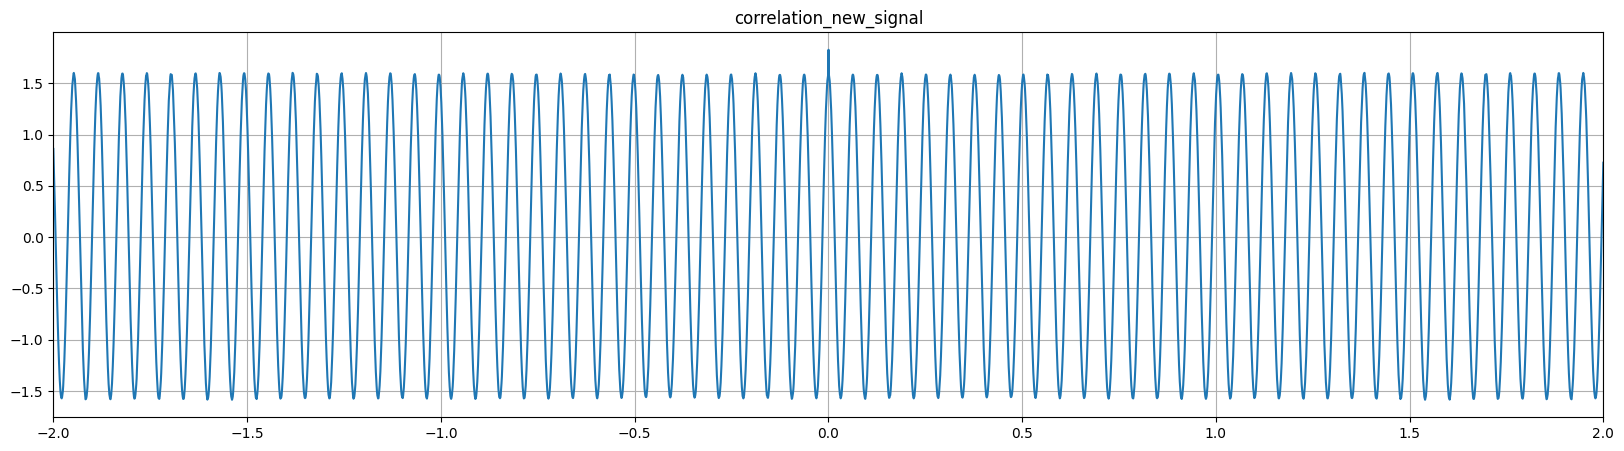

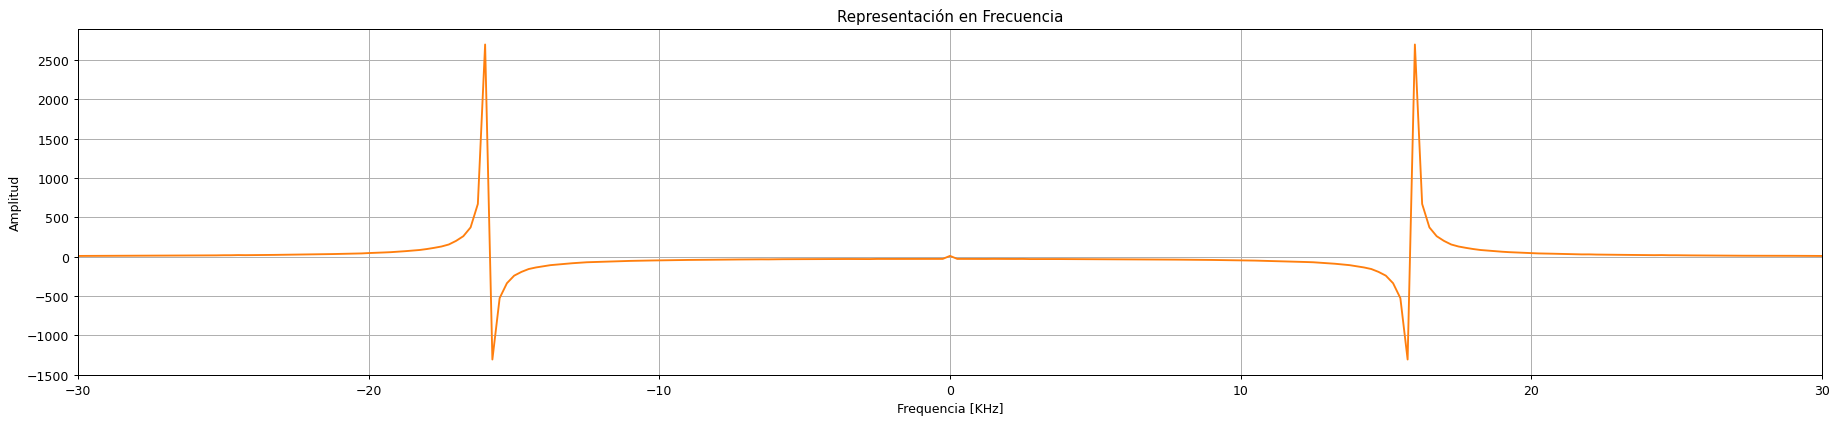

In [34]:
correlation_new_signal = autocross(new_signal,new_signal)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_new_signal)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation_new_signal")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_new_signal,xmax=30,ymax=None)

In [35]:
t = np.linspace(0,4,4096)
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
k_cosine,Output_Circuit_cosine,_=lti_system.output(new_signal, t) ##SALIDA DEL CIRCUITO.

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, new_signal)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k_cosine, Output_Circuit_cosine)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

Text(0.5, 0, 'Time')

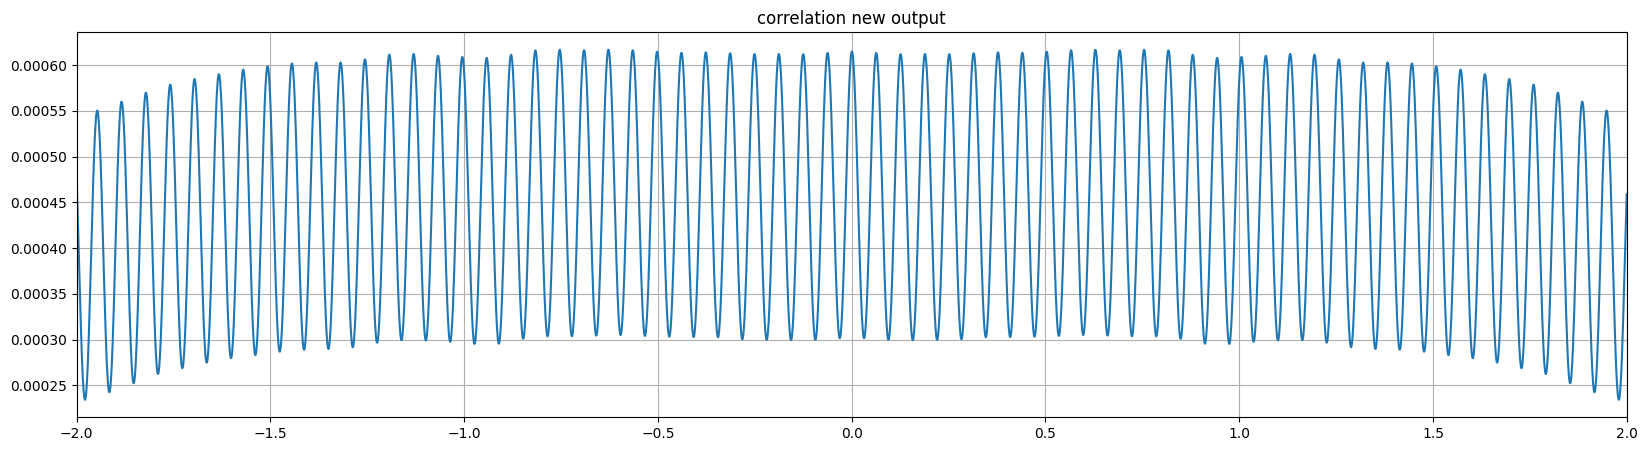

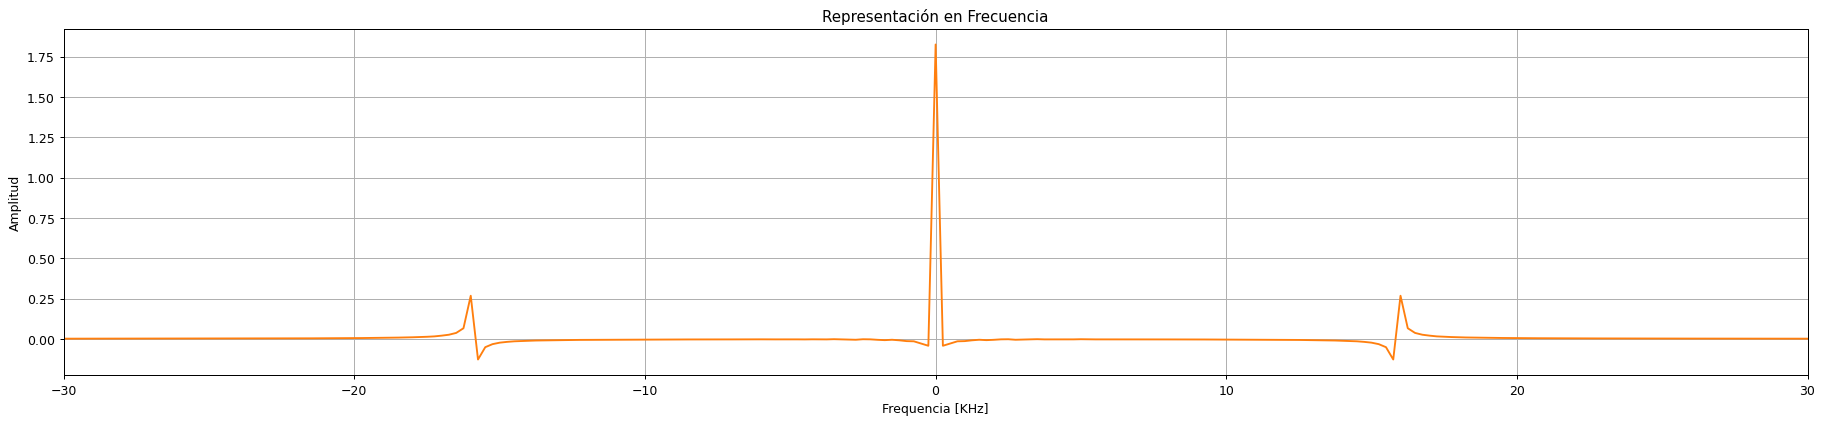

In [36]:
correlation_circuit_new = autocross(Output_Circuit_cosine,Output_Circuit_cosine)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_circuit_new)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation new output")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_circuit_new,xmax=30,ymax=None)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Realizar la convolución
Sy = np.convolve(sys.num, meanx)
print('estimated: ', Sy)
print('Real: ', meanx)

estimated:  [16.4450019-9.69352280e-31j 69.9787315-4.12490332e-30j]
Real:  (16.445001902741275-9.693522803355794e-31j)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b5db5645-a74a-44a4-9cc8-fea742f1c3f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>